<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/04222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.11 模型选择、欠拟合和过拟合

In [0]:
%matplotlib inline 
import torch 
import numpy as np
import d2l 

### 1. 生成数据集

In [0]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5 
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] 
    + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [22]:
print(features[:2], '\n', poly_features[:2], '\n', labels[:2])

tensor([[-0.4623],
        [-0.7162]]) 
 tensor([[-0.4623,  0.2137, -0.0988],
        [-0.7162,  0.5129, -0.3674]]) 
 tensor([3.1631, 0.3315])


### 2. 定义、训练和测试模型

In [0]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [0]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
        range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, 
       '\nbias:', net.bias.data)

### 3. 三阶多项式函数拟合 ( 正常 )

final epoch: train loss 0.00033476532553322613 test loss 0.0004789808299392462
weight: tensor([[ 1.2317, -3.3953,  5.5890]]) 
bias: tensor([4.9944])


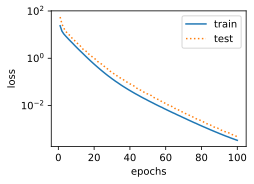

In [25]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
        labels[:n_train], labels[n_train:])

### 4. 线性函数拟合 ( 欠拟合 )

final epoch: train loss 47.021461486816406 test loss 124.1760482788086
weight: tensor([[12.6655]]) 
bias: tensor([2.4718])


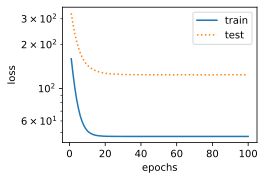

In [26]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

### 5. 训练样本不足 ( 过拟合 )

final epoch: train loss 2.122419595718384 test loss 347.2262268066406
weight: tensor([[0.0112, 0.5072, 0.3567]]) 
bias: tensor([1.4475])


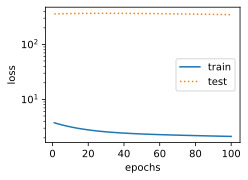

In [27]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])